<a href="https://colab.research.google.com/github/ArtemAvanesov/Python-Labs/blob/master/%D0%AD%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5%20%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D1%8B/Autoencoders/autoencoders_leafs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# Encoder

In [170]:
input_img = Input(shape=(148, 148, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2))(x)
print(encoded.shape)

(None, 37, 37, 2)


# Decoder

In [173]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (2, 2), activation='sigmoid', padding='same')(x)

print(decoded.shape)

(None, 148, 148, 3)


# Set model params 

In [168]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_48 (InputLayer)        (None, 148, 148, 3)       0         
_________________________________________________________________
conv2d_393 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_136 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_394 (Conv2D)          (None, 74, 74, 2)         578       
_________________________________________________________________
max_pooling2d_137 (MaxPoolin (None, 37, 37, 2)         0         
_________________________________________________________________
conv2d_395 (Conv2D)          (None, 37, 37, 64)        1216      
_________________________________________________________________
up_sampling2d_195 (UpSamplin (None, 74, 74, 64)        0  

# Load and split data

In [176]:
train_dir = '/content/drive/My Drive/Colab/Roonyx/work_5/splitted_dataset/train'
validation_dir = '/content/drive/My Drive/Colab/Roonyx/work_5/splitted_dataset/validation'
test_dir = '/content/drive/My Drive/Colab/Roonyx/work_5/splitted_dataset/test'

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(148, 148),
        batch_size=300,
        class_mode='input')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(148, 148),
        batch_size=300,
        class_mode='input')

test_generator=test_datagen.flow_from_directory(
        test_dir,
        target_size=(148,148),
        batch_size=10,
        class_mode='input')

Found 1598 images belonging to 4 classes.
Found 339 images belonging to 4 classes.
Found 339 images belonging to 4 classes.


# Train model

In [178]:
autoencoder.fit(train_generator,
                epochs=50,
                shuffle=True,
                validation_data=validation_generator)

Epoch 1/50
6/6 [==============================] - 156s 26s/step - loss: 0.6503 - val_loss: 0.6513
Epoch 2/50
6/6 [==============================] - 154s 26s/step - loss: 0.6496 - val_loss: 0.6411
Epoch 3/50
6/6 [==============================] - 148s 25s/step - loss: 0.6435 - val_loss: 0.6410
Epoch 4/50
6/6 [==============================] - 147s 25s/step - loss: 0.6404 - val_loss: 0.6375
Epoch 5/50
6/6 [==============================] - 147s 24s/step - loss: 0.6379 - val_loss: 0.6398
Epoch 6/50
6/6 [==============================] - 149s 25s/step - loss: 0.6387 - val_loss: 0.6491
Epoch 7/50
6/6 [==============================] - 144s 24s/step - loss: 0.6325 - val_loss: 0.6399
Epoch 8/50
6/6 [==============================] - 145s 24s/step - loss: 0.6358 - val_loss: 0.6327
Epoch 9/50
6/6 [==============================] - 143s 24s/step - loss: 0.6345 - val_loss: 0.6368
Epoch 10/50
6/6 [==============================] - 150s 25s/step - loss: 0.6319 - val_loss: 0.6303
Epoch 11/50
6/6 [==

In [0]:

autoencoder.save('/content/drive/My Drive/Colab/Autoencoders/leafs.h5')

# Plot result

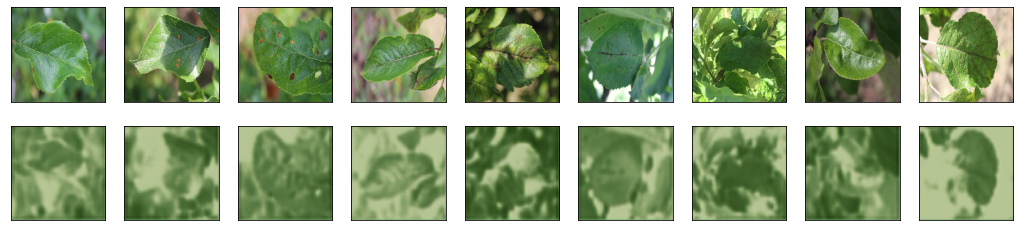

In [179]:
x_test,_ = test_generator.next()
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n, 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(148, 148,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(148, 148,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)